## Normalização
* Obter a média dos termos(**np.mean()**):
    * $\text{Média: }\mu_k=\frac{1}{m}\sum\limits_{i=1}^{m}x_k^{(i)}$ (Onde 'm' é a quantidade das linhas)

* Calcular o desvio padrão dos termos(**np.std()**):
    * $\text{Desvio Padrão: }\sigma_k=\sqrt{\frac{1}{m}\sum\limits_{i=1}^{m}(x_k^{(i)}-\mu_k)^2}$

* Atribuir o "novo" valor de X para cada X calculado:
    * $X_k=\frac{x_k-\mu_k}{\sigma_k}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 7) #(width,height)
plt.rcParams['axes.grid'] = True
plt.rcParams['text.usetex'] = True

In [3]:
wine_red = pd.read_csv('../inputs/winequality-red.csv', sep=';')

In [4]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_red.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [7]:
len(wine_red.columns[:-1])

11

In [8]:
wine_red[wine_red.columns[:-1]].to_numpy()

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [9]:
wine_red[wine_red.columns[-1:]].to_numpy()

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]])

In [10]:
x = wine_red[wine_red.columns[:-1]].to_numpy()
y = wine_red[wine_red.columns[-1:]].to_numpy()

m = len(wine_red.columns[:-1])

initial_theta = np.zeros(m+1).reshape(m+1,1) 
#TAMANHO DO THETA TEM Q SER DO TAMANHO TOTAL DAS VARIAVEIS INCLUINDO A VARIAVEL A SER PREDITA?

X = np.ones((len(x),m+1))
X[:,1:] = x

In [11]:
x.shape

(1599, 11)

In [12]:
y.shape

(1599, 1)

In [13]:
X.shape

(1599, 12)

In [14]:
X.shape[0]

1599

In [15]:
len(X)

1599

In [16]:
initial_theta.shape

(12, 1)

In [17]:
def linear_regression(num_it, alpha, theta):
    err = np.zeros(num_it)
    for i in range(num_it):
        h = np.dot(X,theta)
        e = h-y
        J = (np.dot(e.T,e)/(2*m))
        err[i] = J
        theta = theta - ((alpha/m)*np.dot(X.T,e))
    return err, theta

normalizacao vai deixar tudo numa mesma escala

In [18]:
def normalize(X):
    media = X.mean() # vou passar as colunas pra calcular a media
    desvio_padrao = X.std() # e as colunas pra calcular o desvio tb
    for i in range(len(X)):
        X[i] = (X[i] - media)/desvio_padrao

m é quantidade de linhas da matrix

In [19]:
for col in X.T[1:]:
    print(col)

[7.4 7.8 7.8 ... 6.3 5.9 6. ]
[0.7   0.88  0.76  ... 0.51  0.645 0.31 ]
[0.   0.   0.04 ... 0.13 0.12 0.47]
[1.9 2.6 2.3 ... 2.3 2.  3.6]
[0.076 0.098 0.092 ... 0.076 0.075 0.067]
[11. 25. 15. ... 29. 32. 18.]
[34. 67. 54. ... 40. 44. 42.]
[0.9978  0.9968  0.997   ... 0.99574 0.99547 0.99549]
[3.51 3.2  3.26 ... 3.42 3.57 3.39]
[0.56 0.68 0.65 ... 0.75 0.71 0.66]
[ 9.4  9.8  9.8 ... 11.  10.2 11. ]


In [20]:
for col in X.T[1:]:
    normalize(col)

In [21]:
for col in X.T[1:]:
    print(col)

[-0.52835961 -0.29854743 -0.29854743 ... -1.1603431  -1.39015528
 -1.33270223]
[ 0.96187667  1.96744245  1.29706527 ... -0.09955388  0.65462046
 -1.21684919]
[-1.39147228 -1.39147228 -1.18607043 ... -0.72391627 -0.77526673
  1.02199944]
[-0.45321841  0.04341614 -0.16942723 ... -0.16942723 -0.38227061
  0.75289408]
[-0.24370669  0.2238752   0.09635286 ... -0.24370669 -0.26496041
 -0.43499018]
[-0.46619252  0.87263823 -0.08366945 ...  1.2551613   1.54205361
  0.20322286]
[-0.37913269  0.62436323  0.22904665 ... -0.19667889 -0.07504302
 -0.13586095]
[ 0.55827446  0.02826077  0.13426351 ... -0.53355375 -0.67665745
 -0.66605717]
[ 1.28864292 -0.7199333  -0.33117661 ...  0.70550789  1.6773996
  0.51112954]
[-0.57920652  0.1289504  -0.04808883 ...  0.54204194  0.30598963
  0.01092425]
[-0.96024611 -0.58477711 -0.58477711 ...  0.54162988 -0.20930812
  0.54162988]


In [22]:
np.arange(0.001, 0.009, 0.001)

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008])

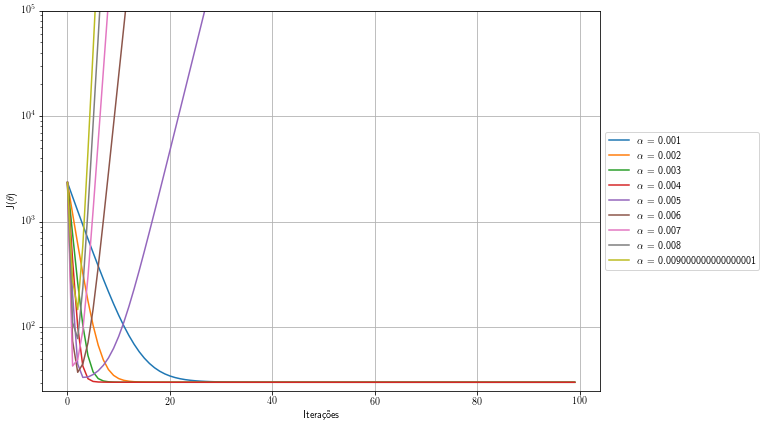

In [23]:
NUM_IT = 100
for alpha in np.arange(0.001, 0.01, 0.001):
    err, new_theta = linear_regression(NUM_IT, alpha, initial_theta)
    plt.plot(range(NUM_IT), err, label=fr'$\alpha$ = {alpha}')
plt.axis(ymin=25, ymax=10e4)
plt.yscale('log')
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.savefig(os.path.join('..','imgs/')+'loss.pdf', bbox_inches='tight')

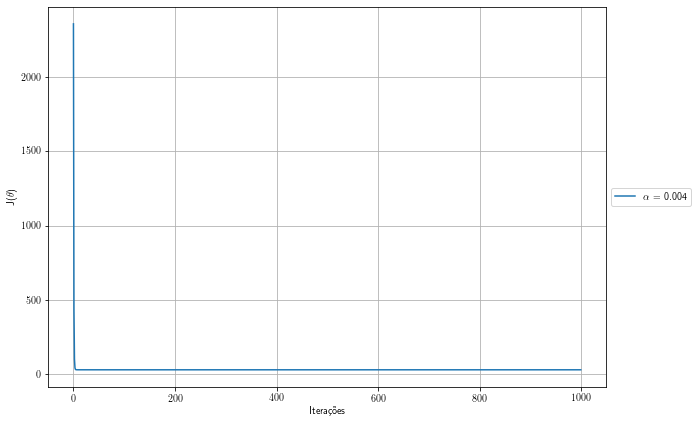

In [24]:
NUM_IT = 1000
alpha = 0.004
err, new_theta = linear_regression(NUM_IT, alpha, initial_theta)
plt.plot(range(NUM_IT), err, label=fr'$\alpha$ = {alpha}')
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

grafico de loss

ERRO ABSOLUTO MEDIO p saber qnt q ele ta errando

H_THETA É NOTA DO VINHO

h(x) que é o mesmo que H_THETA é o que o modelo predizeu

In [25]:
alpha = 0.003
err, new_theta = linear_regression(NUM_IT, alpha, initial_theta)

In [26]:
new_theta

array([[ 5.63602251],
       [ 0.04349735],
       [-0.19396667],
       [-0.03555254],
       [ 0.02301871],
       [-0.08818339],
       [ 0.04560596],
       [-0.10735582],
       [-0.03373717],
       [-0.06384247],
       [ 0.1552765 ],
       [ 0.29424288]])

## DÚVIDAS

### PORQUE OS VALORES DE THETA DE 0.001 ATE 0.004 FICAM NA MESMA FAIXA?

### O QUE SIGNIFICA PLOTAR SOMENTE OS VALORES DE THETA?

### O QUE SIGNIFICA CADA VALOR DE THETA?

In [166]:
alpha = 0.004
err, new_theta = linear_regression(NUM_IT, alpha, initial_theta)
print(new_theta)

[[ 5.63602251]
 [ 0.04349735]
 [-0.19396667]
 [-0.03555254]
 [ 0.02301871]
 [-0.08818339]
 [ 0.04560596]
 [-0.10735582]
 [-0.03373717]
 [-0.06384247]
 [ 0.1552765 ]
 [ 0.29424288]]
